In [1]:
import pandas as pd
df=pd.read_csv("Final.csv")

In [2]:
df = df.drop('Rating', axis=1)
df

,Monument,Username,ReviewTime,Review
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ..."
...,...,...,...,...
129680,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz..."
129681,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ..."
129682,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t..."
129683,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.


Cleaning and preprocessing the dataset

In [3]:
#Finding the null values in reviews
print(df.shape)
df.isnull().sum()

(129685, 4)


Monument         0
Username         1
ReviewTime       0
Review        4103
dtype: int64

In [4]:
#Dropping the rows where reviews do not exist

df=df.dropna()

In [5]:
#Ensuring the null rows are removed
print(df.shape)
df.isnull().sum()

(125582, 4)


Monument      0
Username      0
ReviewTime    0
Review        0
dtype: int64

In [6]:
# Lowercase the text

def lower(data):
#     print(data)
    cleaned_data = [x.lower() for x in data]
    return cleaned_data

In [7]:
#Remove punctuations and blank spaces

import re

def punc_remove(sample):
    clean_sample=[]
    for text in sample:
        temp=re.sub(r'[^\w\s]', '', text)
        clean_sample.append(temp)
    return clean_sample

In [8]:
#Perform tokenization

from nltk.tokenize import word_tokenize
def tokenize(data):
    data = [word_tokenize(x) for x in data]
    return data

In [9]:
#Remove stop words and blank spaces

from nltk.corpus import stopwords

def remove_stop_blank(data):
    stop_words = set(stopwords.words('english'))
    stop_words.add(' ')
    clean_data=[]
    for x in data:
        temp=[]
        for i in x:
            if i not in stop_words:
                temp.append(i)
        clean_data.append(temp)
    return clean_data

In [10]:
#Lemmatizing the tokens

from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

def lemmatize_text(data):
    lemmatized_data=[]
    for x in data:
        temp=[]
        for i in x:
            temp.append(lemmatizer.lemmatize(i))
        lemmatized_data.append(temp)
    return lemmatized_data

# data=[['loving', 'vintage', 'springs', 'vintage', 'strat', 'good', 'tension', 'great', 'stability', 'floating', 'bridge', 'want', 'springs', 'way', 'go'], ['works', 'great', 'guitar', 'bench', 'mat', 'rugged', 'enough', 'abuse', 'take', 'care', 'take', 'care', 'makes', 'organization', 'workspace', 'much', 'easier', 'screws', 'wont', 'roll', 'around', 'color', 'good'], ['use', 'everything', 'acoustic', 'bass', 'ukuleles', 'know', 'smaller', 'model', 'available', 'ukes', 'violins', 'etc', 'havent', 'yet', 'ordered', 'work', 'smaller', 'instruments', 'one', 'doesnt', 'extend', 'feet', 'maximum', 'width', 'theyre', 'gentle', 'instruments', 'grippy', 'material', 'keeps', 'secure', 'greatest', 'benefit', 'writing', 'music', 'computer', 'needing', 'set', 'guitar', 'use', 'keyboardmouse', 'easier', 'hanging', 'stand', 'several', 'gave', 'one', 'friend', 'christmas', 'well', 'ive', 'used', 'mine', 'stage', 'folds', 'small', 'enough', 'fit', 'right', 'gig', 'bag'], ['great', 'price', 'good', 'quality', 'didnt', 'quite', 'match', 'radius', 'sound', 'hole', 'close', 'enough'], ['bought', 'bass', 'split', 'time', 'primary', 'bass', 'dean', 'edge', 'might', 'winning', 'bass', 'boost', 'outstanding', 'active', 'pickups', 'really', 'allow', 'adjust', 'sound', 'want', 'recommend', 'anyone', 'youre', 'beginner', 'like', 'long', 'ago', 'excellent', 'bass', 'start', 'youre', 'tour', 'andor', 'music', 'making', 'money', 'bass', 'beatiful', 'stage', 'color', 'bit', 'darker', 'picture', 'around', 'great', 'buy']]
# data=lemmatize_text(data)
# print(data)

In [11]:
def preprocess(data):
    step1=lower(data)
#     print(step1)
    step2=punc_remove(step1)
#     print(step2)
    step3=tokenize(step2)
#     print(step3)
    step4=remove_stop_blank(step3)
#     print(step4)
    step5=lemmatize_text(step4)
#     print(step5)
    step6 = [' '.join(ele) for ele in step5]
    return step6

# data=[['loving', 'vintage', 'springs', 'vintage', 'strat', 'good', 'tension', 'great', 'stability', 'floating', 'bridge', 'want', 'springs', 'way', 'go'], ['works', 'great', 'guitar', 'bench', 'mat', 'rugged', 'enough', 'abuse', 'take', 'care', 'take', 'care', 'makes', 'organization', 'workspace', 'much', 'easier', 'screws', 'wont', 'roll', 'around', 'color', 'good'], ['use', 'everything', 'acoustic', 'bass', 'ukuleles', 'know', 'smaller', 'model', 'available', 'ukes', 'violins', 'etc', 'havent', 'yet', 'ordered', 'work', 'smaller', 'instruments', 'one', 'doesnt', 'extend', 'feet', 'maximum', 'width', 'theyre', 'gentle', 'instruments', 'grippy', 'material', 'keeps', 'secure', 'greatest', 'benefit', 'writing', 'music', 'computer', 'needing', 'set', 'guitar', 'use', 'keyboardmouse', 'easier', 'hanging', 'stand', 'several', 'gave', 'one', 'friend', 'christmas', 'well', 'ive', 'used', 'mine', 'stage', 'folds', 'small', 'enough', 'fit', 'right', 'gig', 'bag'], ['great', 'price', 'good', 'quality', 'didnt', 'quite', 'match', 'radius', 'sound', 'hole', 'close', 'enough'], ['bought', 'bass', 'split', 'time', 'primary', 'bass', 'dean', 'edge', 'might', 'winning', 'bass', 'boost', 'outstanding', 'active', 'pickups', 'really', 'allow', 'adjust', 'sound', 'want', 'recommend', 'anyone', 'youre', 'beginner', 'like', 'long', 'ago', 'excellent', 'bass', 'start', 'youre', 'tour', 'andor', 'music', 'making', 'money', 'bass', 'beatiful', 'stage', 'color', 'bit', 'darker', 'picture', 'around', 'great', 'buy']
# data=preprocess(data)

In [12]:
reviews_from_df=df['Review'].tolist()
preprocessed_reviews=preprocess(reviews_from_df)

In [13]:
df['preprocessed_reviews']=preprocessed_reviews
df

<ipython-input-13-a604ae45a20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_reviews']=preprocessed_reviews


,Monument,Username,ReviewTime,Review,preprocessed_reviews
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,nahargarh fort good place capture beautiful vi...
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,place want weekend weekday fort super awesome ...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,place want weekend weekday fort super awesome ...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,beautiful fort amazing architecture view city ...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",visiting jaipur place one best destination vis...
...,...,...,...,...,...
129680,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",excellent experience perfect weather amazing v...
129681,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",flight got cancelled hence couldnãâât show vis...
129682,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",well experience fantastic view service viewing...
129683,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,beautiful view london shard


Initializing Model and retriveing sentiments of reviews

In [46]:

from textblob import TextBlob

def analyze_sentiment(review):
    # Create TextBlob object
    blob = TextBlob(review)
    # Get polarity score
    polarity = blob.sentiment.polarity
    # Categorize sentiment
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Perform sentiment analysis on each review
df['Sentiment'] = df['preprocessed_reviews'].apply(analyze_sentiment)

df

<ipython-input-46-f2feadf4c804>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['preprocessed_reviews'].apply(analyze_sentiment)


,Monument,Username,ReviewTime,Review,preprocessed_reviews,Sentiment
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,nahargarh fort good place capture beautiful vi...,positive
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,place want weekend weekday fort super awesome ...,positive
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,place want weekend weekday fort super awesome ...,positive
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,beautiful fort amazing architecture view city ...,positive
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",visiting jaipur place one best destination vis...,positive
...,...,...,...,...,...,...
129680,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",excellent experience perfect weather amazing v...,positive
129681,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",flight got cancelled hence couldnãâât show vis...,neutral
129682,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",well experience fantastic view service viewing...,positive
129683,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,beautiful view london shard,positive


In [48]:
#Ensuring the model has performed correctly

unique_sent = tdf['Sentiment'].unique()
unique_sent

array(['positive', 'negative', 'neutral'], dtype=object)

In [50]:
# Assigning a score for each review based on sentiment

def assign_review_score(sentiment):
    if sentiment == "negative":
        return -1
    elif sentiment == "neutral":
        return 0
    elif sentiment == "positive":
        return 1
    else:
        return None  # Handle unknown sentiments if any

# Apply sentiment analysis and assign review scores

df['Review_Score'] = df['Sentiment'].apply(assign_review_score)
df

<ipython-input-50-94e9fd2c3038>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_Score'] = df['Sentiment'].apply(assign_review_score)


,Monument,Username,ReviewTime,Review,preprocessed_reviews,Sentiment,Review_Score
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,nahargarh fort good place capture beautiful vi...,positive,1
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,place want weekend weekday fort super awesome ...,positive,1
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,place want weekend weekday fort super awesome ...,positive,1
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,beautiful fort amazing architecture view city ...,positive,1
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",visiting jaipur place one best destination vis...,positive,1
...,...,...,...,...,...,...,...
129680,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",excellent experience perfect weather amazing v...,positive,1
129681,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",flight got cancelled hence couldnãâât show vis...,neutral,0
129682,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",well experience fantastic view service viewing...,positive,1
129683,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,beautiful view london shard,positive,1


In [52]:
#Finding the unique monuments in the dataset

unique_monuments = df['Monument'].unique()

print("Number of Unique monuments in the dataset are:"+str(len(unique_monuments)))
# Print unique monuments
print("Unique Monuments:")
for monument in unique_monuments:
    print(monument)

Number of Unique monuments in the dataset are:123
Unique Monuments:
Nahargarh Fort - Jaipur
Jaigarh Fort - Jaipur
Qutub Minar - Delhi
Bibi Ka Maqbara - Aurangabad
Elephanta Cave - Mumbai
Gateway Of India - Mumbai
Kanheri Caves - Mumbai
Shree Jagannath Temple - puri
Konark Sun Temple - puri
Golden Temple - Amritsar, Punjab
Adhai Din Ka Jhonpra - Ajmer
Safdarjung Tomb - Delhi
Shalimar Garden - Srinagar
Gol Gumbaz - Bijapur
Ajanta- Ellora Caves - Aurangabad
Humayun Tomb - Delhi
Nishat Garden - Srinagar
Lohagarh Fort - Rajasthan, India
Khwaja Gharib Nawaz Dargah Sharif
Mehrangarh Fort - Jodhpur
Sabarmati Ashram - Ahmedabad
Red Fort - Delhi
Dilwara Jain Temple - Mount Abu
Hawa Mahal - Jaipur
Jantar Mantar- New Delhi
Palace of Versailles - France Versailles
Lincoln Memorial - United States Washington -  D.C
Colosseum - Forum - Palatine Hill Circuit - Italy Rome
Eiffel Tower - France Paris
Cologne Cathedral - Germany Cologne
Peterhof Palace - Russia Saint Petersburg
Lazienki Palace - Poland W

In [72]:
df['Review_Weight']

0         0.5
1         0.5
2         0.5
3         0.5
4         0.5
         ... 
129680    0.5
129681    0.5
129682    0.5
129683    0.5
129684    0.5
Name: Review_Weight, Length: 125582, dtype: float64

In [55]:
average_scores = df.groupby('Monument')['Review_Score'].mean()

sorted_scores = average_scores.sort_values(ascending=False)

print("Monuments Sorted by Best reviewed:")
print(sorted_scores)

Monuments Sorted by Best reviewed:
Monument
Schonbrunn Palace - Austria Vienna              0.942574
Chateau de Chenonceau - Chenonceaux, France     0.942574
Castillo San Felipe del Morro                   0.938614
The Shard , London bridge street, london, UK    0.938614
The Gateway Arch - St. Louis, Missouri, USA     0.932584
                                                  ...   
Vishnupad Temple - Gaya                         0.641818
Deewan-E- Khas - Lal Qila, New Delhi            0.639485
Vietnam Veterans Memorial - Washington DC       0.627530
Saint George Fort - Chennai                     0.604386
Moti Masjid - Delhi                             0.538153
Name: Review_Score, Length: 123, dtype: float64


In [58]:
top_10_monuments = sorted_scores.head(10).index

# Filter dataset for the top 6 monuments
top_10_dataset = df[df['Monument'].isin(top_10_monuments)]

# Calculate percentage of positive, neutral, and negative sentiments for each monument
sentiment_counts = top_10_dataset.groupby(['Monument', 'Sentiment']).size()
total_reviews = sentiment_counts.groupby(level=0).sum()

# Calculate percentage for each sentiment category
percentage_positive = (sentiment_counts.loc[:, 'positive'] / total_reviews) * 100
percentage_neutral = (sentiment_counts.loc[:, 'neutral'] / total_reviews) * 100
percentage_negative = (sentiment_counts.loc[:, 'negative'] / total_reviews) * 100

# Print percentages for each sentiment category
print("Percentage of Positive, Neutral, and Negative Reviews for the Top 10 Monuments:")
for monument in top_10_monuments:
    print(f"Monument: {monument}")
    print(f"Positive: {percentage_positive[monument]:.2f}%")
    print(f"Neutral: {percentage_neutral[monument]:.2f}%")
    print(f"Negative: {percentage_negative[monument]:.2f}%")
    print()

Percentage of Positive, Neutral, and Negative Reviews for the Top 10 Monuments:
Monument: Schonbrunn Palace - Austria Vienna
Positive: 95.94%
Neutral: 2.38%
Negative: 1.68%

Monument: Chateau de Chenonceau - Chenonceaux, France
Positive: 95.64%
Neutral: 2.97%
Negative: 1.39%

Monument: Castillo San Felipe del Morro
Positive: 95.74%
Neutral: 2.38%
Negative: 1.88%

Monument: The Shard , London bridge street, london, UK
Positive: 96.24%
Neutral: 1.39%
Negative: 2.38%

Monument: The Gateway Arch - St. Louis, Missouri, USA
Positive: 96.07%
Neutral: 1.12%
Negative: 2.81%

Monument: Nahargarh Fort - Jaipur
Positive: 95.34%
Neutral: 1.82%
Negative: 2.84%

Monument: Hawa Mahal - Jaipur
Positive: 94.67%
Neutral: 2.67%
Negative: 2.67%

Monument: Lincoln Memorial - United States Washington -  D.C
Positive: 94.26%
Neutral: 3.47%
Negative: 2.28%

Monument: Edinburgh Castle - United Kingdom Edinburgh
Positive: 95.25%
Neutral: 1.49%
Negative: 3.27%

Monument: Arc de Triomphe - France Paris
Positive: 9

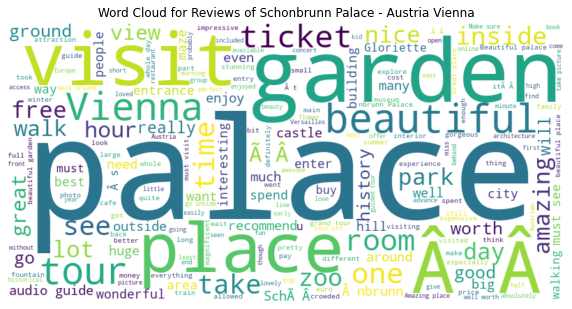

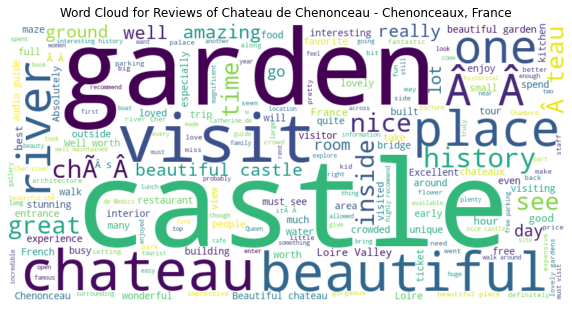

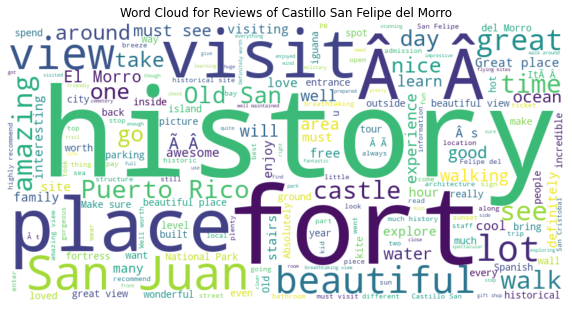

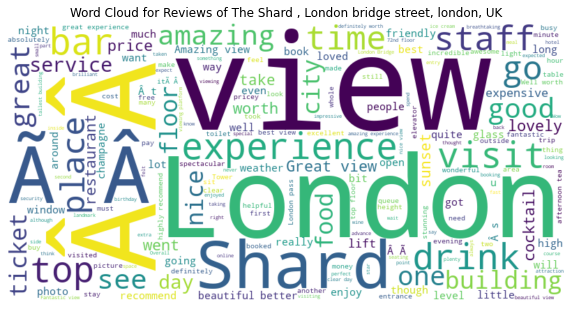

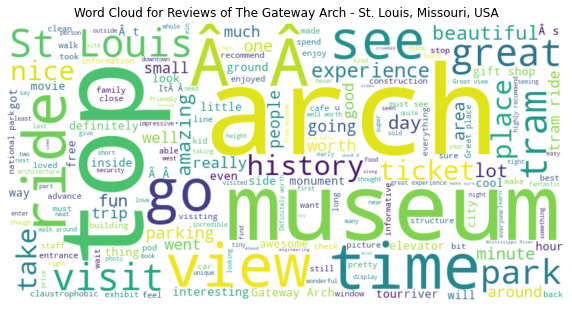

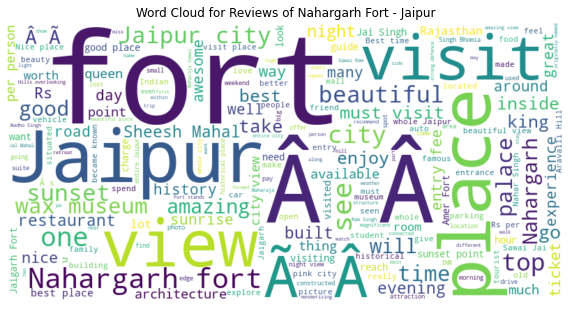

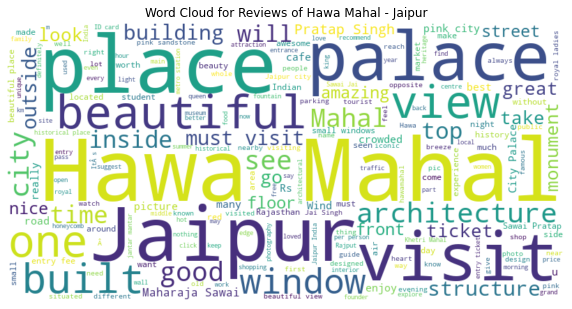

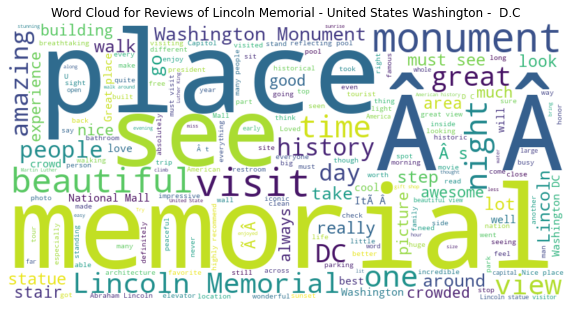

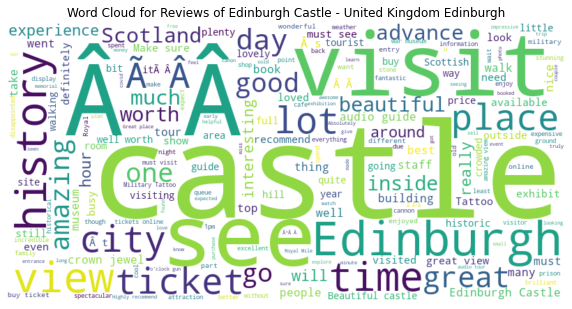

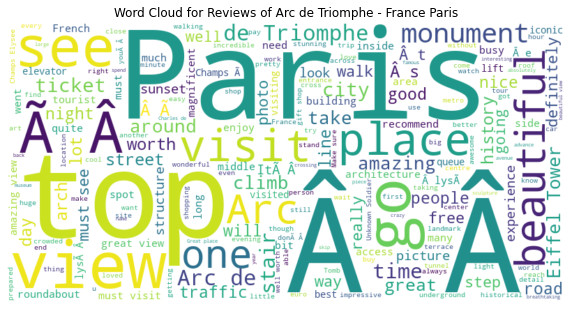

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word clouds for reviews of a specific monument
def generate_word_cloud(monument_name, reviews):
    # Combine all reviews into a single string
    text = ' '.join(reviews)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Reviews of {monument_name}')
    plt.axis('off')
    plt.show()

# Create word clouds for each of the top 6 monuments
for monument in top_10_monuments:
    monument_reviews = top_10_dataset[top_10_dataset['Monument'] == monument]['Review']
    generate_word_cloud(monument, monument_reviews)


In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64

# Define a function to generate word clouds for reviews of a specific monument
def generate_word_cloud(monument_name, reviews, filename):
    # Combine all reviews into a single string
    text = ' '.join(reviews)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud and save as image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Reviews of {monument_name}')
    plt.axis('off')
    plt.savefig(filename, format="png", bbox_inches='tight')
    plt.close()

# Create word clouds for each of the top 6 monuments and save as images
wordcloud_filenames = []
for monument in top_10_monuments:
    monument_reviews = top_10_dataset[top_10_dataset['Monument'] == monument]['Review']
    filename = f"{monument.replace(' ', '_')}_wordcloud.png"
    generate_word_cloud(monument, monument_reviews, filename)
    wordcloud_filenames.append(filename)

# Create HTML content
html_content = "<html><head><title>Monument Analysis</title></head><body>"

# Add percentages and word clouds to HTML content
for i, monument in enumerate(top_10_monuments):
    html_content += f"<h2>{monument}</h2>"
    html_content += f"<p>Positive: {percentage_positive[monument]:.2f}%</p>"
    html_content += f"<p>Neutral: {percentage_neutral[monument]:.2f}%</p>"
    html_content += f"<p>Negative: {percentage_negative[monument]:.2f}%</p>"
    html_content += f"<img src=\"data:image/png;base64,{base64.b64encode(open(wordcloud_filenames[i], 'rb').read()).decode('utf-8')}\" /><br><br>"

# Complete HTML content
html_content += "</body></html>"

# Write HTML content to file
with open("monument_analysis.html", "w") as f:
    f.write(html_content)

# Delete temporary word cloud image files
import os
for filename in wordcloud_filenames:
    os.remove(filename)

print("HTML file generated successfully.")


HTML file generated successfully.


In [ ]:
os.getcwd()

In [14]:
from datetime import datetime, timedelta
import re

# Function to parse relative time formats like "n weeks ago", "n months ago", and "n years ago"
def parse_relative_time(relative_time):
#     print(relative_time)
    if relative_time == 'a week ago':
        return timedelta(weeks=1)
    elif relative_time == 'a month ago':
        return timedelta(days=30)
    elif relative_time == 'a year ago':
        return timedelta(days=365)
    match = re.match(r'(\d+) (weeks?|months?|years?) ago', relative_time)
#     print(match)
    if match:
        num_units = int(match.group(1))
#         print(num_units)
        unit = match.group(2)
#         print(unit)
        if unit.endswith('weeks'):
            temp=num_units * 7
            return timedelta(days=temp)
        elif unit.endswith('months'):
            temp=num_units * 30
            return timedelta(days=temp)
        elif unit.endswith('years'):
            temp=num_units * 365
            return timedelta(days=temp)
    return None

In [23]:


# Function to calculate review weight based on review time
def calculate_review_weight(review_time):
    # Try to parse the review time as a relative time format
    relative_time_delta = parse_relative_time(review_time)
    print(type(relative_time_delta))
    current_datetime = datetime.now()
    print(type(current_datetime))
    review_datetime =datetime.now() - relative_time_delta
#     print(review_datetime)
#     print(current_datetime)
        # Calculate time difference in days between review time and current time
    time_difference = (datetime.now() - review_datetime).days
        # Assign weight based on time difference (e.g., inverse of time difference)
        # You can adjust this calculation based on your specific requirements
    return 1 / (time_difference + 1)





In [24]:
# from datetime import datetime

# def calculate_review_weight(review_time):
    
#     review_datetime = datetime.strptime(review_time, '%Y-%m-%d %H:%M:%S')
 
#     current_datetime = datetime.now()
#     time_difference = (current_datetime - review_datetime).days
#     return 1 / (time_difference + 1)

# Apply calculate_review_weight function to calculate review weight
df['Review_Weight'] = df['ReviewTime'].apply(calculate_review_weight)


<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<c

<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<class 'datetime.datetime'>
<class 'datetime.timedelta'>
<c

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'NoneType'

In [26]:
df.isnull().sum()

Monument                0
Username                0
ReviewTime              0
Review                  0
preprocessed_reviews    0
dtype: int64